# 📌 Introduction

![image.png](attachment:ecafcddb-f01b-47ac-b38e-1cd964b2b971.png)

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, _ in os.walk('/kaggle/input'):
#         print(dirname)

In [15]:
train_path = r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train"
test_path = r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Test"

## Import Libraries

In [16]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Visualization

In [17]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        if(img_array is not None):
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 144/144 [00:00<00:00, 517.95it/s]


In [18]:
# img_array=cv2.imread(file)
# if(img_array is not None):
#     img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [19]:
data.shape

(379, 2)

In [20]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\mk_Dataset\\Train\\Akash': 235,
         'C:\\Users\\Asus TUF\\OneDrive\\Desktop\\mk_Dataset\\Train\\Rinub': 144})

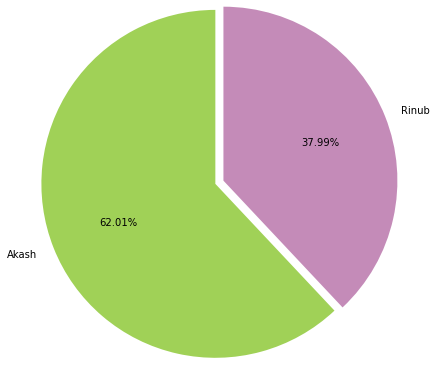

In [21]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Akash', 'Rinub'], colors= colors,radius=2)
plt.show()

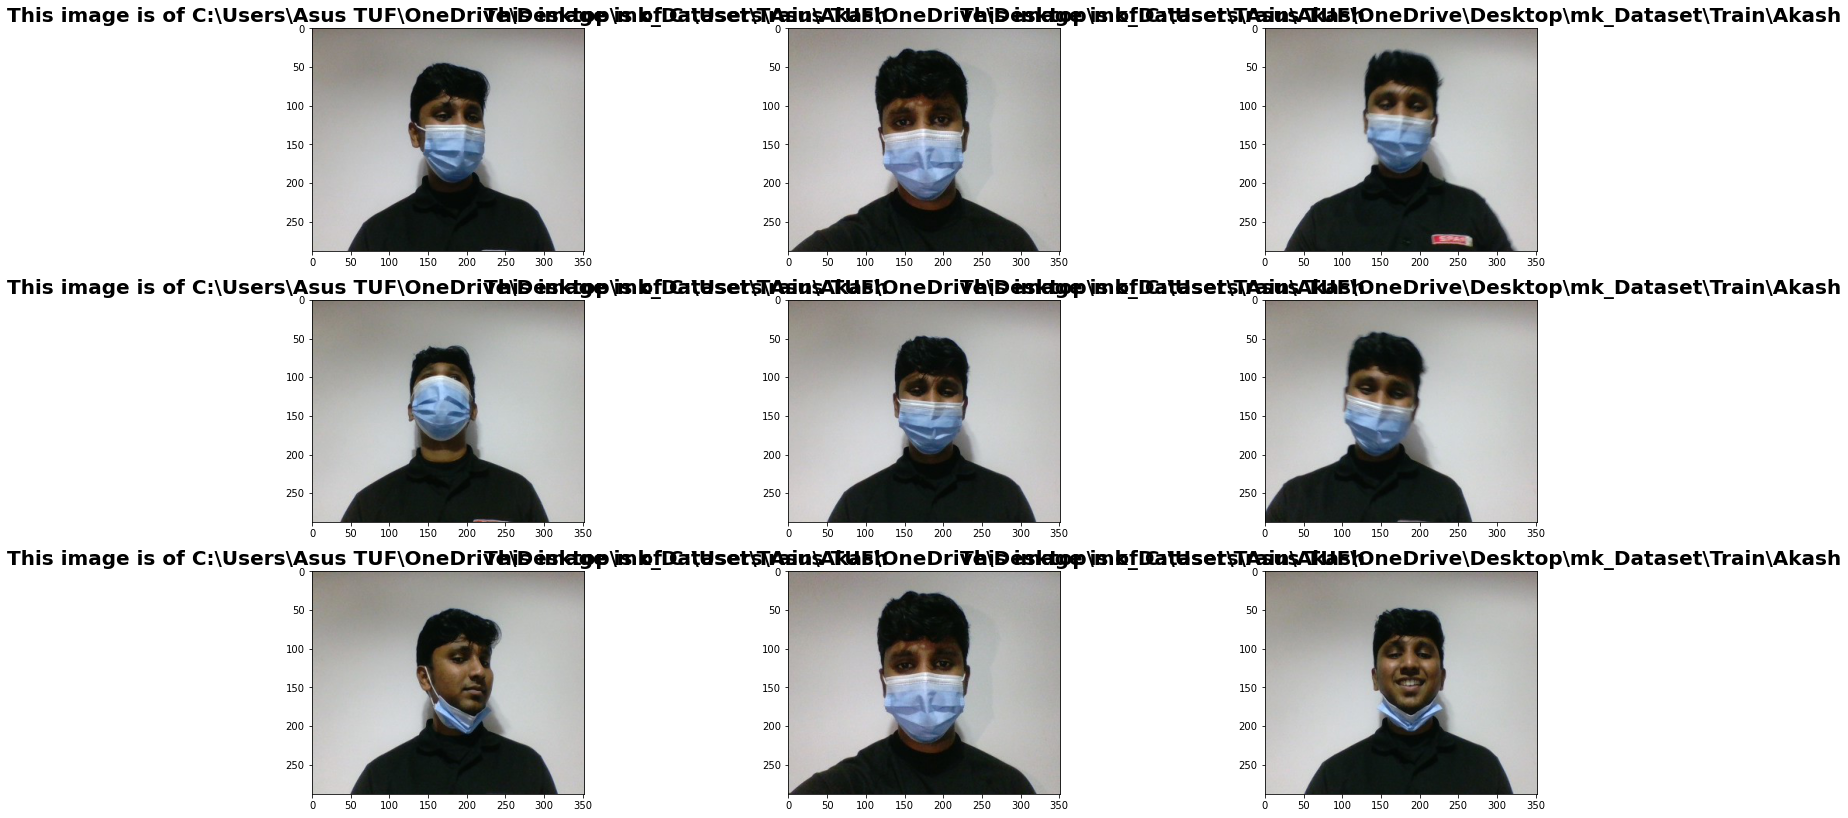

In [22]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(150)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [23]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [26]:
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [27]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [28]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 379 images belonging to 2 classes.
Found 379 images belonging to 2 classes.


In [30]:
hist = model.fit(train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
2/2 [==============================] - 18s 9s/step - loss: 1.2106 - accuracy: 0.5673 - val_loss: 0.5487 - val_accuracy: 0.9815
Epoch 2/10
2/2 [==============================] - 10s 5s/step - loss: 0.9135 - accuracy: 0.5831 - val_loss: 0.5525 - val_accuracy: 0.6359
Epoch 3/10
2/2 [==============================] - 15s 7s/step - loss: 0.5246 - accuracy: 0.8127 - val_loss: 0.3769 - val_accuracy: 0.8681
Epoch 4/10
2/2 [==============================] - 9s 5s/step - loss: 0.3959 - accuracy: 0.8496 - val_loss: 0.1326 - val_accuracy: 0.9868
Epoch 5/10
2/2 [==============================] - 9s 5s/step - loss: 0.2302 - accuracy: 0.9446 - val_loss: 0.0491 - val_accuracy: 0.9974
Epoch 6/10
2/2 [==============================] - 15s 8s/step - loss: 0.1170 - accuracy: 0.9789 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 15s 7s/step - loss: 0.0689 - accuracy: 0.9921 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 8/10
2/2 [====================

In [37]:
#Saving the model
model.save(r"C:\Users\Asus TUF\OneDrive\Desktop\akash_model\model_dl.h5")


In [38]:
import keras
model_dl = keras.models.load_model(r"C:\Users\Asus TUF\OneDrive\Desktop\akash_model\model_dl.h5") #look for local saved file

The recognized image is Akash


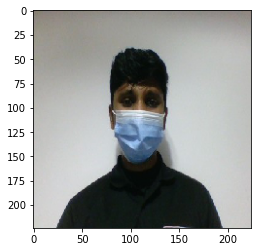

In [39]:
#We´ll use any image sample from the Kaggle dataset to test it 

from keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter

# dict = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"Cancel",11:"Check_Account_Balance",12:"Deposit_cash",13:"Next",14:"Withdraw_Cash"}


#Predicting images

img = image.load_img(r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train\Akash\WIN_20211129_17_00_32_Pro (2).jpg", target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model_dl.predict(image, batch_size=256)
probabilities = model_dl.predict_proba(image, batch_size= 256)
probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

# print(probabilities_formatted) 
if probabilities_formatted == ['100.00%', '0.00%']:
    print('The recognized image is Akash')
    plt.imshow(img)
    
else:
    print('The recognized image is an Rinub')
    plt.imshow(img)
# print(f'The predicted image corresponds to "{dict[classes.item()]}" with probability.') 



The recognized image is an Rinub


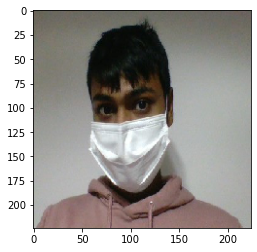

In [40]:
#We´ll use any image sample from the Kaggle dataset to test it 

from keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter

# dict = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"Cancel",11:"Check_Account_Balance",12:"Deposit_cash",13:"Next",14:"Withdraw_Cash"}


#Predicting images

img = image.load_img(r"C:\Users\Asus TUF\OneDrive\Desktop\mk_Dataset\Train\Rinub\WIN_20211129_16_31_44_Pro.jpg", target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model_dl.predict(image, batch_size=256)
probabilities = model_dl.predict_proba(image, batch_size= 256)
probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

# print(probabilities_formatted) 
if probabilities_formatted == ['100.00%', '0.00%']:
    print('The recognized image is Akash')
    plt.imshow(img)
    
else:
    print('The recognized image is an Rinub')
    plt.imshow(img)
# print(f'The predicted image corresponds to "{dict[classes.item()]}" with probability.') 



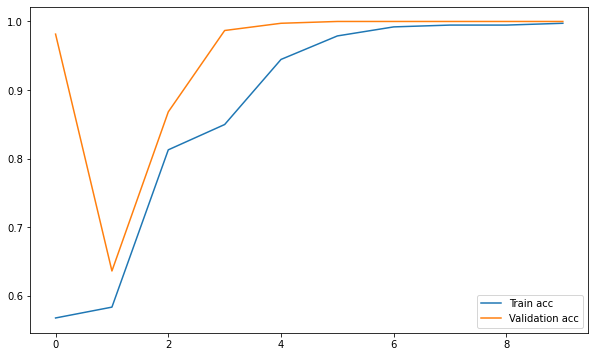

In [34]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

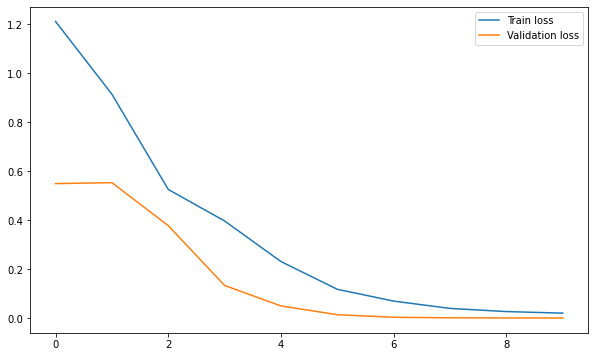

In [35]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()